<a href="https://colab.research.google.com/github/Snehitha2021/suv_purcase-prediction/blob/main/suv_purcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/content/SUV_Purchase.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#data processing
from sklearn import preprocessing  

#labelencodingg
LE=preprocessing.LabelEncoder()

#fitting it to our dataset

df.Gender=LE.fit_transform(df.Gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [6]:
df.drop('User ID', inplace=True, axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


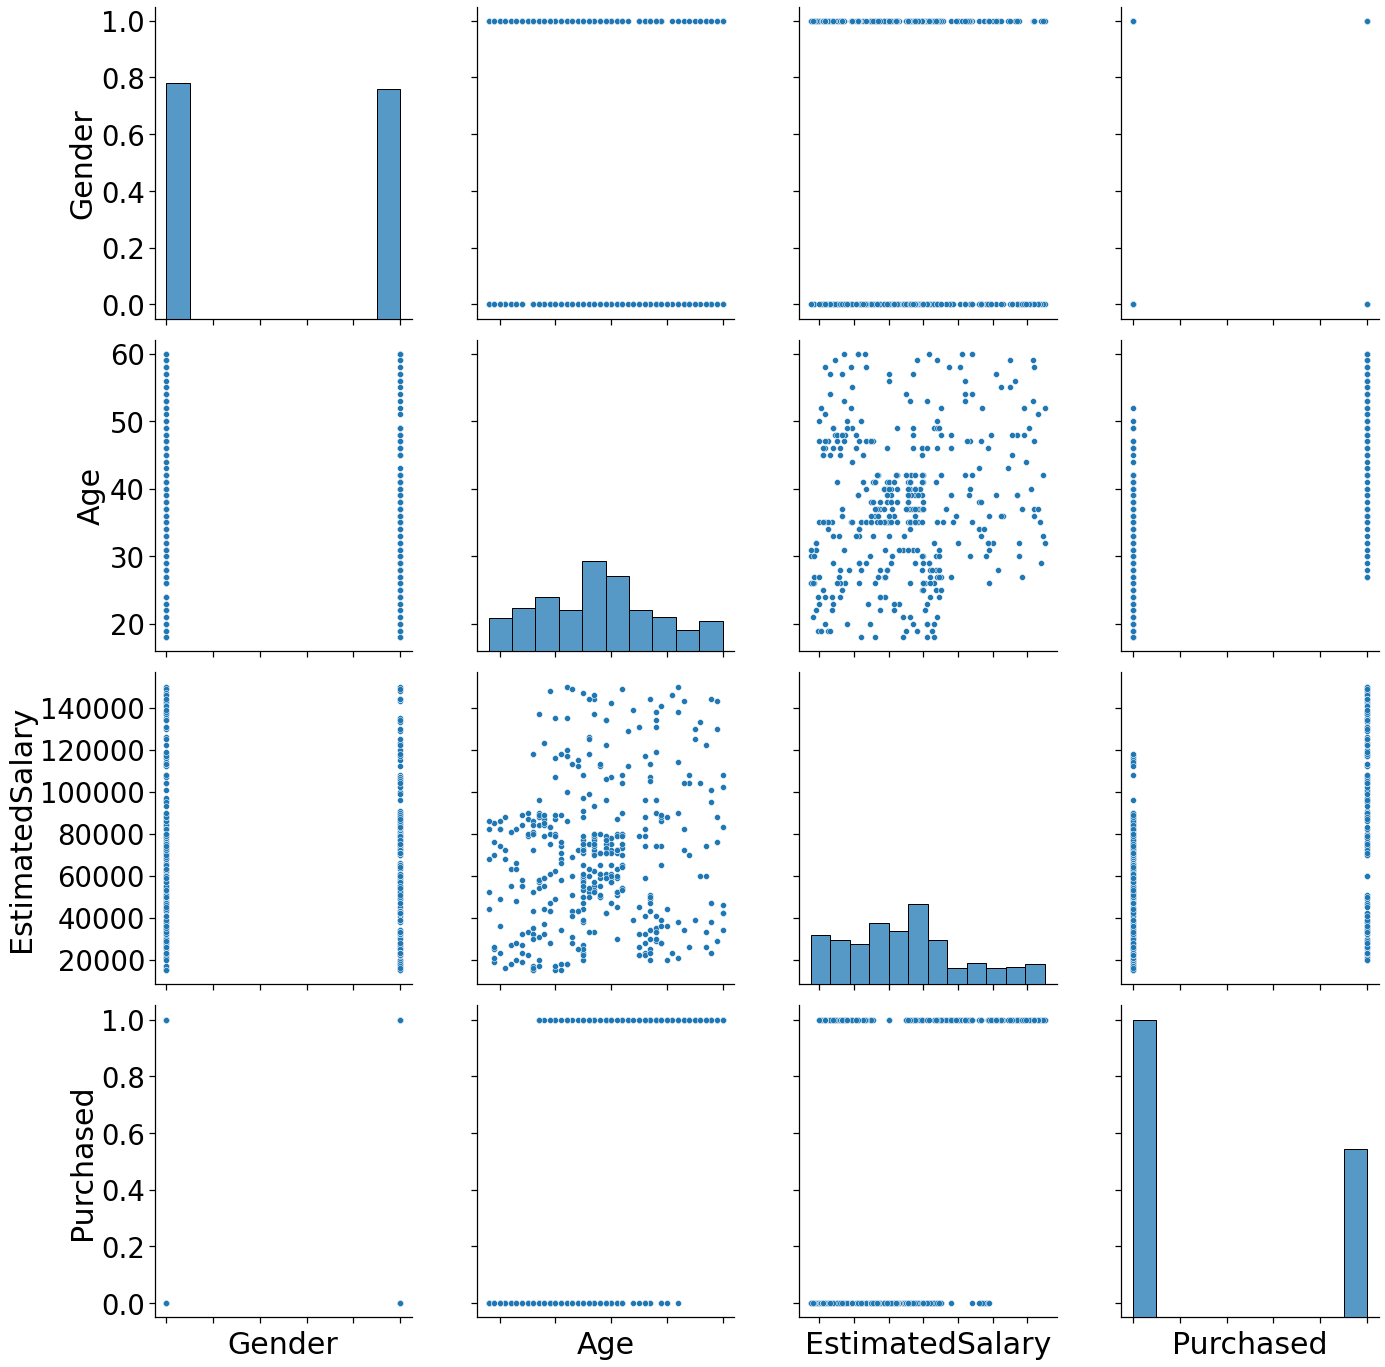

In [29]:
#understanding the distribution with seaborn 
import seaborn as sns
with sns.plotting_context("notebook",font_scale=2.5):
  g = sns.pairplot(df[['Gender','Age','EstimatedSalary','Purchased']],palette='tab10',size=5)
  g.set(xticklabels=[]);

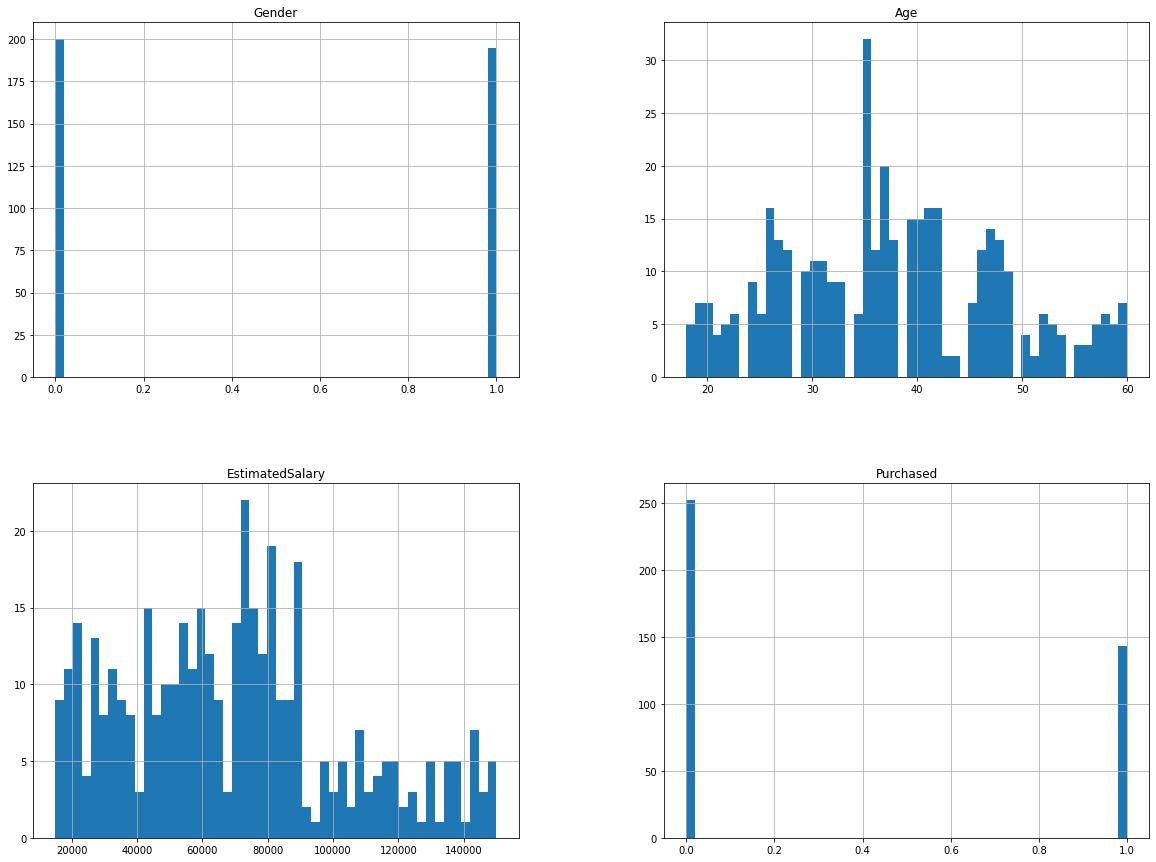

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

In [31]:
WIDTH  = 20
HEIGHT = 6

def plot_vs(frame, col1, col2, hue):
    plt.figure(figsize=(WIDTH, HEIGHT * 2))
    sns.scatterplot(data=frame, x=col1, y=col2, hue=hue)
    plt.title(f"Scatter plot | {col1} vs {col2}")
    plt.show()

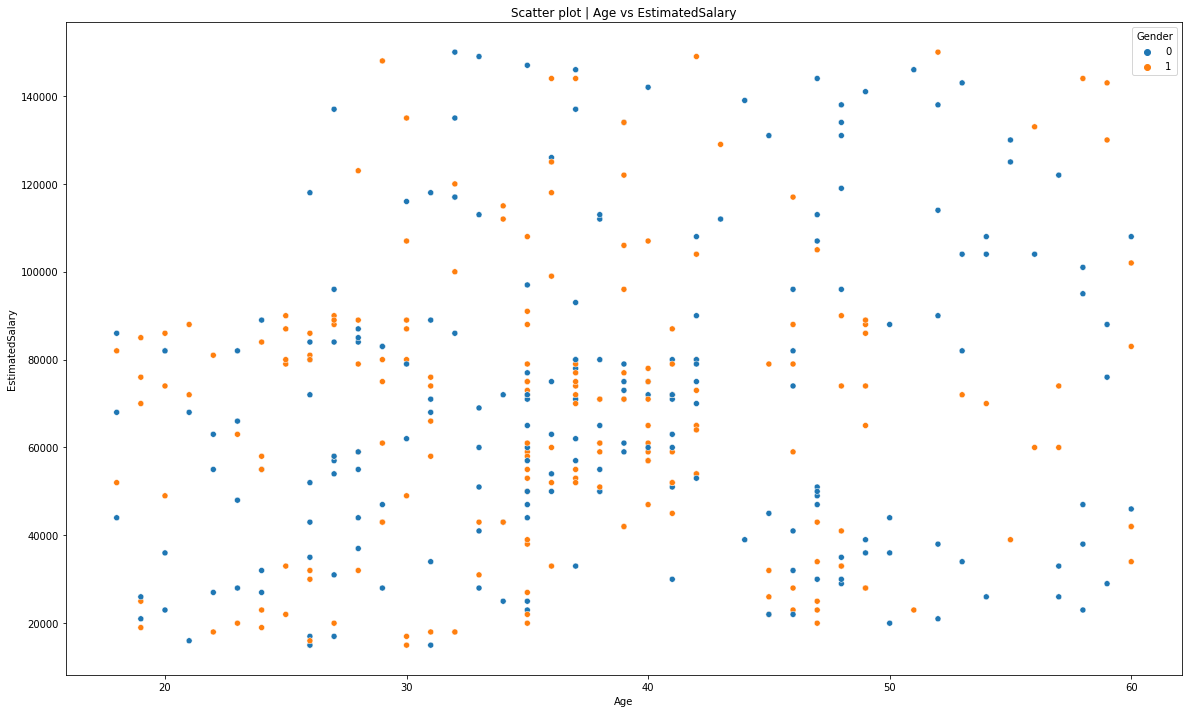

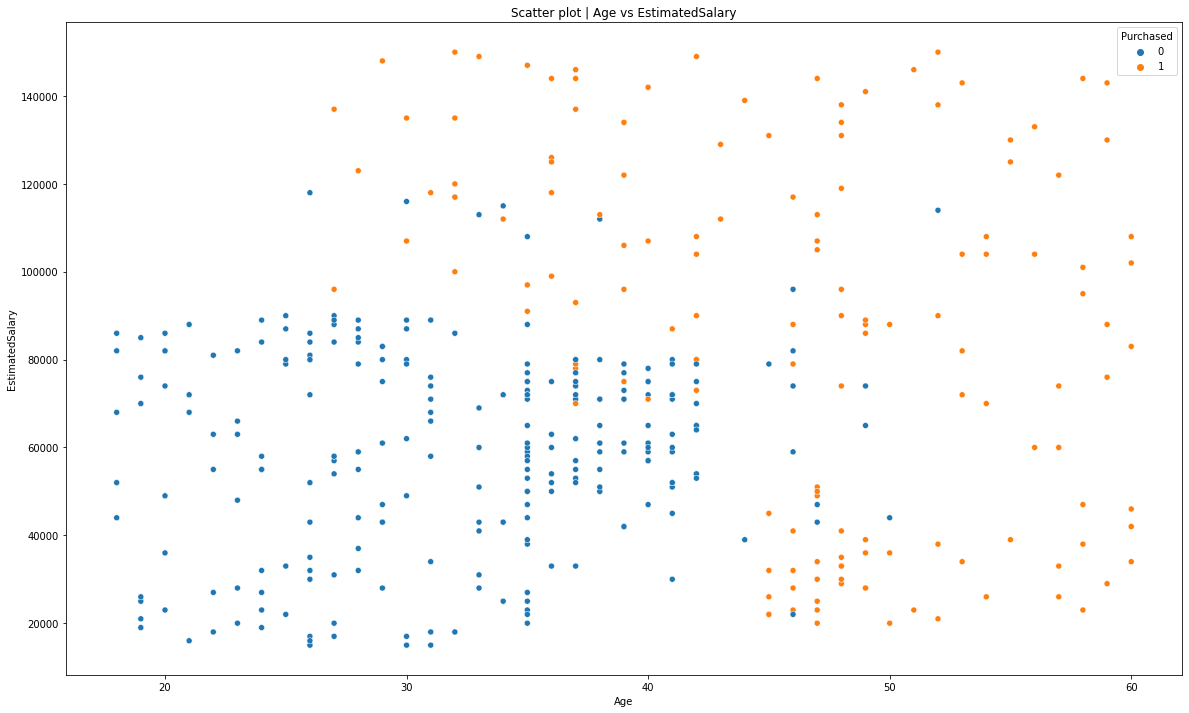

In [32]:

plot_vs(df,'Age', 'EstimatedSalary', 'Gender')
plot_vs( df,'Age', 'EstimatedSalary', 'Purchased')

In [14]:
#importing standard scalar from scikit-learn
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()

#standardzing the xdata apat from the class column
data_scaled=df.iloc[:,:-1].values

data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)



#data_scaled=pd.DataFrame(sst.fit_transform(df.drop('Outbreak),axis=1))
#adding the class column back to datafram

In [15]:
data_scaled.head()

,0,1,2
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


In [16]:
data_scaled['Class']=df.Purchased

In [17]:
data_scaled

,0,1,2,Class
0,1.020204,-1.781797,-1.490046,0
1,1.020204,-0.253587,-1.460681,0
2,-0.980196,-1.113206,-0.785290,0
3,-0.980196,-1.017692,-0.374182,0
4,1.020204,-1.781797,0.183751,0
...,...,...,...,...
395,-0.980196,0.797057,-0.844019,1
396,1.020204,1.274623,-1.372587,1
397,-0.980196,1.179110,-1.460681,1
398,1.020204,-0.158074,-1.078938,0


In [18]:
X=np.array(df[['Gender','EstimatedSalary','Age']])

In [19]:
#loading the data
Y=np.array(df[['Purchased']])

In [20]:
# EstimatedSalary : Outliers handling
df= df.drop(df.query("EstimatedSalary > 120000 and Purchased == 0").index)
# Age : Outliers handling
df = df.drop(df.query("Age > 55 and Purchased == 0").index)

In [21]:
#splitting the dataset
#spliting he data set into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()

#standardzing the xdata apat from the class column
#data_scaled=df.iloc[:,:-1].values

#data_scaled=sst.fit_transform(data_scaled)
#data_scaled=pd.DataFrame(data_scaled)

X_train = sst.fit_transform(X_train)
X_test = sst.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [24]:
y_pred=model.predict(X_test)

In [25]:
print("Predicted value for training data:",model.score(X_train,Y_train))
print("Training accuracy:",model.score(X_train,Y_train)*100)

Predicted value for training data: 0.84375
Training accuracy: 84.375


In [26]:
print("Predicted value for testing data:",model.score(X_test,Y_test))
print("Testing accuracy:",model.score(X_test,Y_test)*100)

Predicted value for testing data: 0.8125
Testing accuracy: 81.25


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(Y_test, y_pred)

print(cm)

accuracy_score(Y_test, y_pred)

[[45  3]
 [12 20]]


0.8125

In [ ]:
'''from matplotlib.colors import ListedColormap

X_set, y_set = data_scaled.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),

                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),

             alpha = 0.75, cmap = ListedColormap(('red', 'green'))) '''

'''plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):

    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')

plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.legend()

plt.show()'''